In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fdsreader

# Set the matplotlib output to svg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Example - Steckler Compartment

## Experimental Setup
In 1982 a series of 55 full-scale experiments was coducted by K.D. Steckler, J.G. Quintiere, W.J. Rinkinen {cite}`Steckler.1982`. In this study they investigated a compartment with the size of $\mf 2.8~m \times 2.8~m \times 2.18~m$.


This compartment had an opening, either a door or a window, with a variable width. Inside the compartment a gas burner with a variable heating power was placed at different locations. The measured data are the temperature and velocity profiles (w.r.t. to height) inside the compartment and in the opening. 

All geometrical details, the experimental matrix and the measurement data can be found in the original publication {cite}`Steckler.1982`.

## Initial FDS Setup

There are two specifics to be pointed to in this setup, which is based on the validation cases provided with FDS. 

* The `TIME_SHRINK_FACTOR=10.` accelerates the computation if a steady-state condition is to be expected. It basically reduces the time for the solids to reach an equilibrium. See section 6.2.3 (Special Topic: Steady-State Applications) in {cite}`FDS-UG-6.7.5`.
* The surface definition `DEFAULT=.TRUE.` sets all, i.e. also the implicit domain boundaries, to the definition of the according `SURF` definition.

```{literalinclude} ./template_steckler.fds
```

## Tasks

Based on the initial FDS setup from above, the following steps are to be conducted in order to simulate test number 13.

### Step 0 – Reading

Familiarise yourself with the work of Steckler et al., especially for the test number 13.

### Step 1 – Opening

Add an opening to the FDS input file, with the extension given by the experimental setup.

Which grid resolution $\mf \Delta x$ is defined in the initial FDS setup?

Check your setup, especially the opening's width with smokeview by executing FDS with a zero simulation time. It is helpful to display the grid and turn on the projection method to a size preserving mode, see the keyboard shortcut section in [SMV Basics](../../tools/01_fds_smv/02_smv). {numref}`fig-steckler-opening` illustrates an example of a suitable view on an opening.

:::{figure-md} fig-steckler-opening

<img src="./figs/steckler_opening.png" width="60%">

Check for the opening size.
:::

### Step 2 – HRR

In the initial setup, there is already a surface property defined. Adopt the specific heat release rate to match the one in test number 13 and add a surface tempertaure of $\mf 100~^\circ C$. This elevated temperature represents the hot surface of the burner.

Plot the heat release rate like in {numref}`fig-steckler-20cm-hrr`, where the curve is shown for the full simulation time.

In [2]:
sim = fdsreader.Simulation('../../../../data/compartment/steckler_test_013_20cm_001m/')

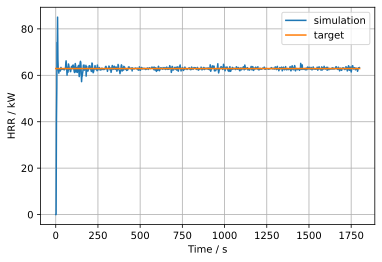

<Figure size 432x288 with 0 Axes>

In [3]:
plt.plot(sim.hrr['Time'], sim.hrr['HRR'], label='simulation')
plt.plot([0,1800], [62.9, 62.9], label='target')
plt.xlabel('Time / s')
plt.ylabel('HRR / kW')
plt.grid()
plt.legend()

plt.savefig('./figs/steckler_20cm_hrr.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-steckler-20cm-hrr

<img src="./figs/steckler_20cm_hrr.svg" width="80%">

Comparison of the targeted heat realease rate and the one achieved in the simulations.
:::

### Step 3 – Output

Add multiple devices at the center of the opening, from the bottom to the top of the opening. The quantities to monitor are the gas temperature and the gas velocity. 

How many devices should be used?

There are two ways to setup the devices:

* A set of individual devices, or
* with a linear array of devices, see section 21.2.2 (Linear Array of Point Devices) in {cite}`FDS-UG-6.7.5`.

Check their positions with Smokeview. They are indicated as green dots, see {numref}`fig-steckler-devices`.

:::{figure-md} fig-steckler-devices

<img src="./figs/steckler_devices.png" width="60%">

Check for the device positioning.
:::

Additionally, check if the quasi steady-state is reached in the simulations, like shown in {numref}`fig-steckler-20cm-temp-devc`.

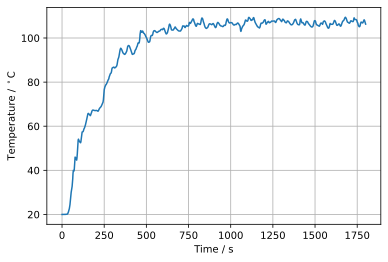

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(sim.devices['Time'].data, sim.devices['TC_Door_Single'].data)
plt.xlabel('Time / s')
plt.ylabel('Temperature / $\sf ^\circ$C')
plt.grid()

plt.savefig('./figs/steckler_20cm_temp-devc.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-steckler-20cm-temp-devc

<img src="./figs/steckler_20cm_temp-devc.svg" width="80%">

Time series of a point temperature measurement in the opening. 
:::

### Step 4 – Comparison with the Experiment

Plot the simulation results for temperature and velocity as time averaged values during the quasi steady-state. Add to these plots the experimental data stated by the study, here you can use the central values (in x-direction). A common representation is to use the y-axis of the plot for the height and the x-axis for the values.

Your results may look like those in {numref}`fig-steckler-20cm-temp-exp` and {numref}`fig-steckler-20cm-velo-exp`.

In [5]:
exp_test_12_temp = [139.99, 135.24, 133.63, 131.56, 130.29, 126.60, 110.53, 53.71, 24.74, 23.54, 24.29, 23.90, 23.05, 22.85, 24.27, 24.29]
exp_test_12_velo = [2.51, 1.92, 1.70, 1.45, 1.19, 0.95, 0.72, 0.07, -0.58, -0.72, -0.81, -0.91, -0.96, -1.03, -1.07, -1.09]
exp_test_12_pos = np.linspace(1.82, 0.057, 16)

exp_test_13_temp = [124.86, 121.38, 121.28, 119.41, 117.87, 112.06, 83.08, 42.82, 25.16, 24.33, 24.92, 24.76, 23.99, 23.83, 25.48, 25.36]
exp_test_13_velo = [2.35, 1.72, 1.50, 1.27, 1.03, 0.83, 0.55, -0.21, -0.56, -0.65, -0.74, -0.80, -0.85, -0.90, -0.91, -0.93]
exp_test_13_pos = np.linspace(1.82, 0.057, 16)

In [6]:
data_20cm = np.loadtxt('../../../../data/compartment/steckler_test_013_20cm_001m/rundir/out_Steckler_013_line.csv', skiprows=2, delimiter=',')

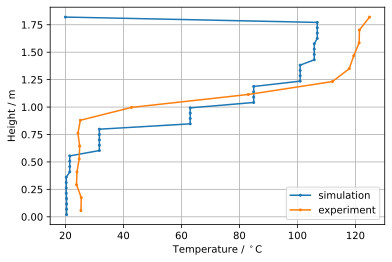

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(data_20cm[:,3], data_20cm[:,2], '-o', ms=2, label='simulation')
# plt.plot(data_10cmd[:,3], data_10cmd[:,2], label='simulation')
plt.plot(exp_test_13_temp, exp_test_13_pos, '-o', ms=2, label='experiment')
plt.legend()
plt.grid()
plt.xlabel('Temperature / $\sf ^\circ$C')
plt.ylabel('Height / m');

plt.savefig('./figs/steckler_20cm_temp-exp.svg')
if show: plt.show();
plt.clf();

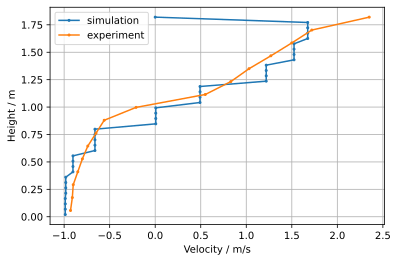

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(data_20cm[:,4], data_20cm[:,2], '-o', ms=2, label='simulation')
plt.plot(exp_test_13_velo, exp_test_13_pos, '-o', ms=2, label='experiment')
plt.legend()
plt.grid()
plt.xlabel('Velocity / m/s')
plt.ylabel('Height / m');

plt.savefig('./figs/steckler_20cm_velo-exp.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-steckler-20cm-temp-exp

<img src="./figs/steckler_20cm_temp-exp.svg" width="80%">

Comparison of the predicted temperature profile with experimental data.
:::

:::{figure-md} fig-steckler-20cm-velo-exp

<img src="./figs/steckler_20cm_velo-exp.svg" width="80%">

Comparison of the predicted velocity profile with experimental data. 
:::

### Step 5 – Grid Resolution

Reduce the grid resolution by a factor of two and four. 

Note: check the total heat release rate!

How does the simulation time change? If you want to reduce the computational time, you can run FDS in parallel, see [parallel execution](../../tools/02_hpc/03_parallel_fds) for more details.

Plot the simulation outcome for the three grid resolutions. Do the results depend on the grid resolution?

In [12]:
# data_05cm = np.loadtxt('../../../../data/compartment/steckler_test_012_05cm/rundir/Steckler_012_line.csv', skiprows=2, delimiter=',')
data_10cm = np.loadtxt('../../../../data/compartment/steckler_test_013_10cm_001m/rundir/out_Steckler_013_line.csv', skiprows=2, delimiter=',')
data_05cm = np.loadtxt('../../../../data/compartment/steckler_test_013_05cm_016m/rundir/out_Steckler_013_line.csv', skiprows=2, delimiter=',')

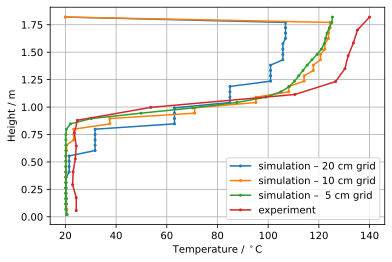

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(data_20cm[:,3], data_20cm[:,2], '-o', ms=2, label='simulation – 20 cm grid')
plt.plot(data_10cm[:,3], data_10cm[:,2], '-o', ms=2, label='simulation – 10 cm grid')
plt.plot(data_05cm[:,3], data_05cm[:,2], '-o', ms=2, label='simulation –  5 cm grid')
plt.plot(exp_test_12_temp, exp_test_12_pos, '-o', ms=2, label='experiment')
plt.legend()
plt.grid()
plt.xlabel('Temperature / $\sf ^\circ$C')
plt.ylabel('Height / m');

plt.savefig('./figs/steckler_20cm_temp-grid-sensitivity.svg')
if show: plt.show();
plt.clf();

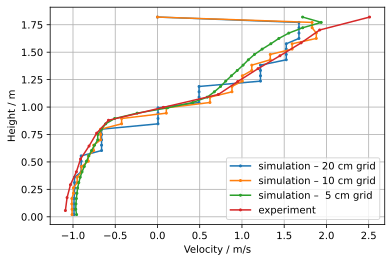

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(data_20cm[:,4], data_20cm[:,2], '-o', ms=2, label='simulation – 20 cm grid')
plt.plot(data_10cm[:,4], data_10cm[:,2], '-o', ms=2, label='simulation – 10 cm grid')
plt.plot(data_05cm[:,4], data_05cm[:,2], '-o', ms=2, label='simulation –  5 cm grid')
plt.plot(exp_test_12_velo, exp_test_12_pos, '-o', ms=2, label='experiment')
plt.legend()
plt.grid()
plt.xlabel('Velocity / m/s')
plt.ylabel('Height / m');

plt.savefig('./figs/steckler_20cm_velo-grid-sensitivity.svg');
if show: plt.show();
plt.clf();

:::{figure-md} fig-steckler-20cm-temp-grid-sensitivity

<img src="./figs/steckler_20cm_temp-grid-sensitivity.svg" width="80%">

Grid sensitivity of the temperature profile.
:::

:::{figure-md} fig-steckler-20cm-velo-grid-sensitivity

<img src="./figs/steckler_20cm_velo-grid-sensitivity.svg" width="80%">

Grid sensitivity of the velocity profile. 
:::